In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('room.csv')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
data.shape

(2665, 7)

In [4]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [6]:
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
data=data.drop('date',axis=1)

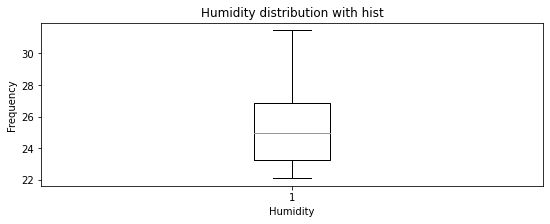

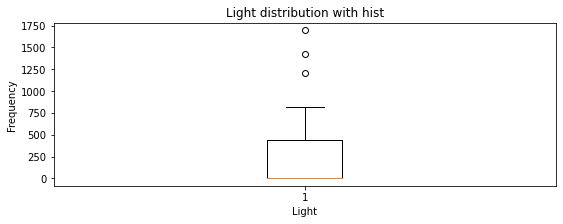

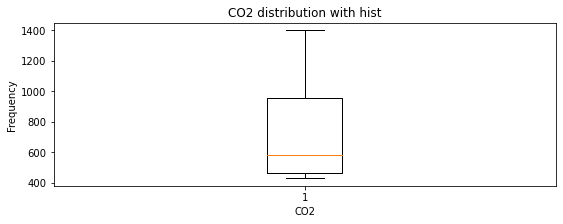

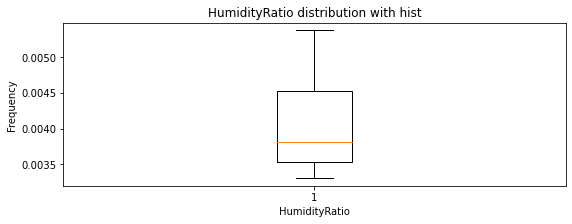

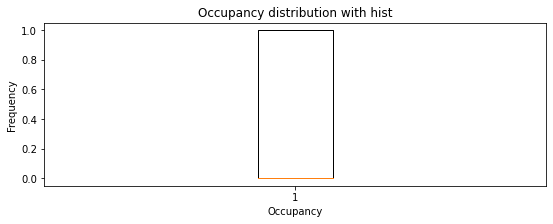

In [8]:
for i in list(data.iloc[:,1:].columns):
    plt.figure(figsize = (9,3))
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8a2841190>,
      dtype=object)

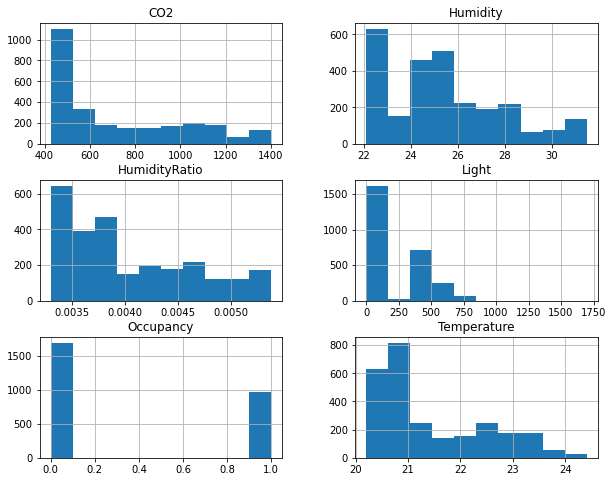

In [9]:
data.hist(figsize=(10,8))

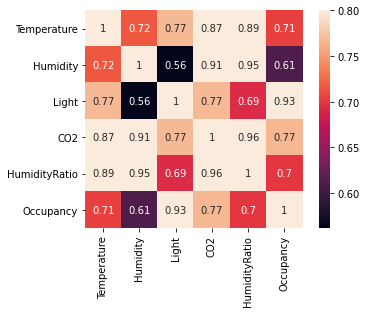

In [10]:
dataset=data.corr()
sns.heatmap(dataset,vmax=.8,square=True,annot=True)
plt.show()

In [11]:
data['Occupancy'].value_counts(normalize=True)

0    0.635272
1    0.364728
Name: Occupancy, dtype: float64

In [12]:
occupied = data[data['Occupancy']==1]
emptied = data[data['Occupancy']==0]

Temperature

Text(0.5, 0, 'Temperatures')

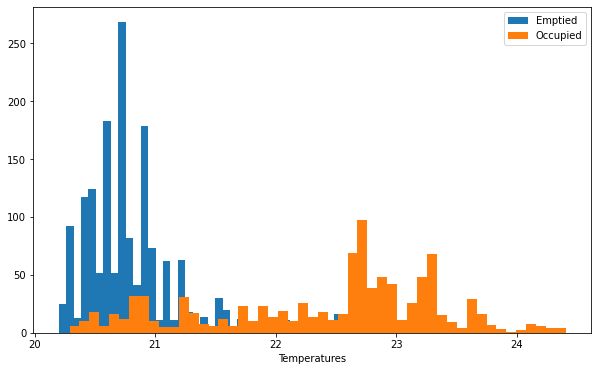

In [13]:
plt.figure(figsize=(10,6))
plt.hist(emptied['Temperature'], bins=50)
plt.hist(occupied['Temperature'], bins=50)
plt.legend(['Emptied','Occupied'])
plt.xlabel('Temperatures')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


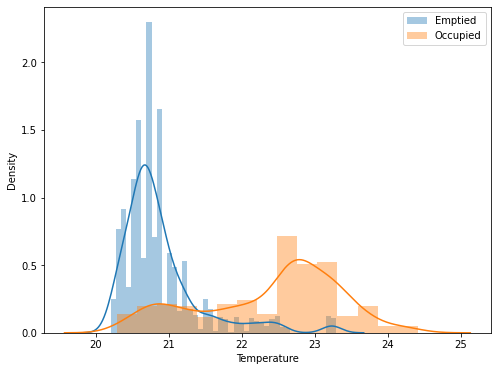

In [14]:
plt.figure(figsize = (8,6))
sns.distplot(emptied['Temperature'],label='Emptied')
sns.distplot(occupied['Temperature'],label='Occupied')
plt.legend()

Humidity

Text(0.5, 0, 'Humidity')

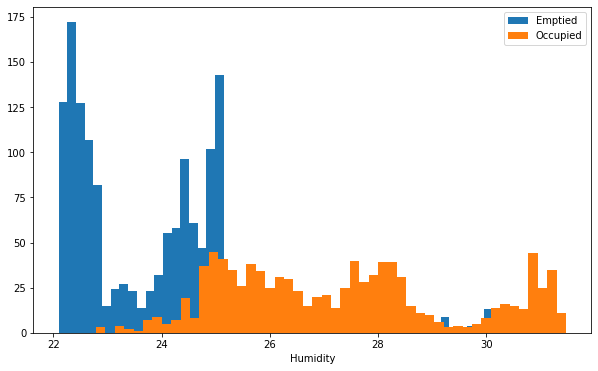

In [15]:
plt.figure(figsize=(10,6))
plt.hist(emptied['Humidity'], bins=50)
plt.hist(occupied['Humidity'], bins=50)
plt.legend(['Emptied','Occupied'])
plt.xlabel('Humidity')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


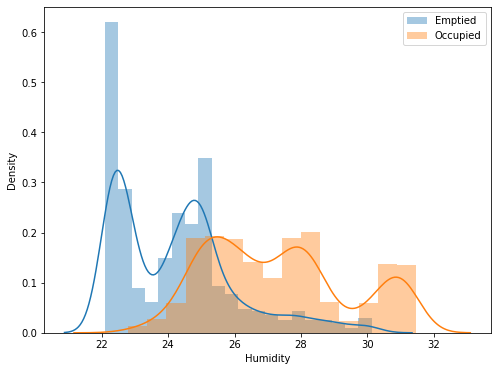

In [16]:
plt.figure(figsize = (8,6))
sns.distplot(emptied['Humidity'],label='Emptied')
sns.distplot(occupied['Humidity'],label='Occupied')
plt.legend()

Light

Text(0.5, 0, 'Light')

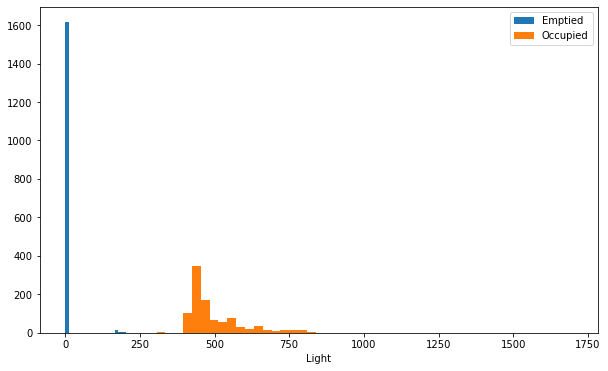

In [17]:
plt.figure(figsize=(10,6))
plt.hist(emptied['Light'], bins=50)
plt.hist(occupied['Light'], bins=50)
plt.legend(['Emptied','Occupied'])
plt.xlabel('Light')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


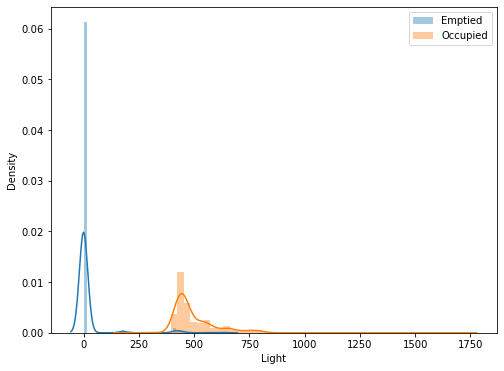

In [18]:
plt.figure(figsize = (8,6))
sns.distplot(emptied['Light'],label='Emptied')
sns.distplot(occupied['Light'],label='Occupied')
plt.legend()

CO2

Text(0.5, 0, 'CO2')

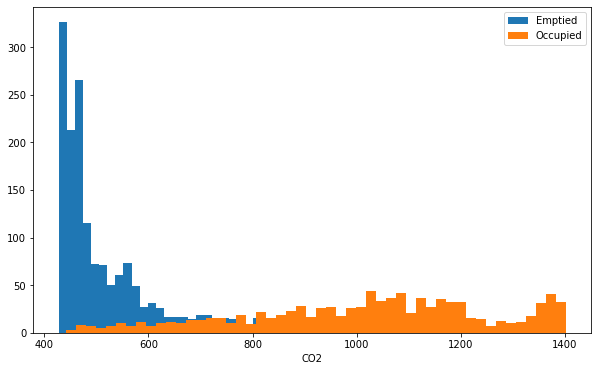

In [19]:
plt.figure(figsize=(10,6))
plt.hist(emptied['CO2'], bins=50)
plt.hist(occupied['CO2'], bins=50)
plt.legend(['Emptied','Occupied'])
plt.xlabel('CO2')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


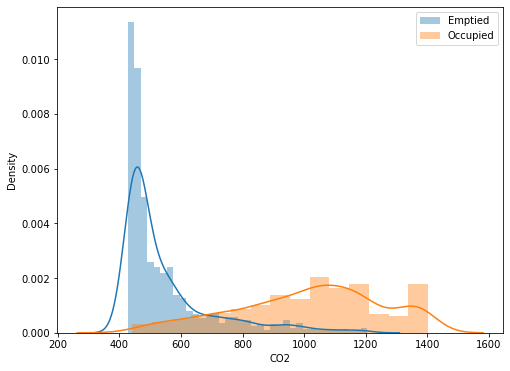

In [20]:
plt.figure(figsize = (8,6))
sns.distplot(emptied['CO2'],label='Emptied')
sns.distplot(occupied['CO2'],label='Occupied')
plt.legend()

HumidityRatio

Text(0.5, 0, 'HumidityRatio')

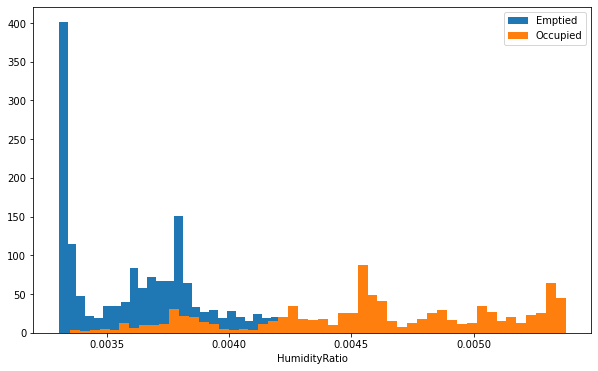

In [21]:
plt.figure(figsize=(10,6))
plt.hist(emptied['HumidityRatio'], bins=50)
plt.hist(occupied['HumidityRatio'], bins=50)
plt.legend(['Emptied','Occupied'])
plt.xlabel('HumidityRatio')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


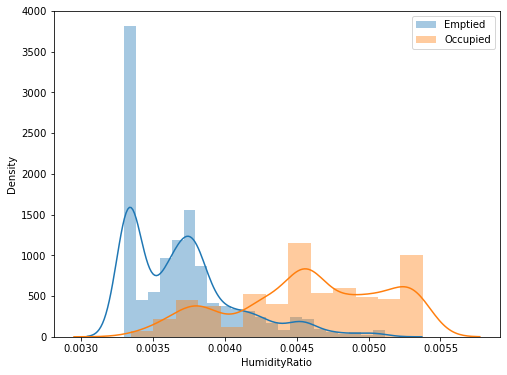

In [22]:
plt.figure(figsize = (8,6))
sns.distplot(emptied['HumidityRatio'],label='Emptied')
sns.distplot(occupied['HumidityRatio'],label='Occupied')
plt.legend()

In [23]:
X= data.drop(columns='Occupancy')
y= data['Occupancy']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 5)
(533, 5)
(2132,)
(533,)


In [26]:
def evaluation(y_test, y_pred, model):
    acc = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    prec= precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    metric = {
        'Model' : [model],
        'Accuracy Score' : round(acc,3),
        'Recall' : round(recall,3),
        'Precision' : round(prec,3),
        'F1 score' : round(f1,3),
    }
    return pd.DataFrame(metric)

In [27]:
res = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'Precision':[] ,'F1 score':[]})

KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [29]:
euclid_model = KNeighborsClassifier (n_neighbors = 5, metric = distance.sqeuclidean)
manhattan_model = KNeighborsClassifier (n_neighbors = 5, metric = distance.cityblock)

In [30]:
euclid_model.fit(X_train, y_train)
manhattan_model.fit(X_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7fa89f938160>)

In [31]:
manhattan_predictions = manhattan_model.predict(X_test)
euclid_predictions = euclid_model.predict(X_test)
df = pd.DataFrame ({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})

In [32]:
df.head()

,actual,manhattan,euclid
1419,1,1,1
2604,1,1,1
478,0,0,0
1264,1,1,1
1741,0,0,0


In [33]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print ('Manhattan Accurracy: {}%'.format(round(100*manhattan_count/len(df),4 )))
print (classification_report (y_test, manhattan_predictions, target_names = df['actual'].astype(str).unique()))
print ('\n')
print ('Euclid Accurracy: {}%'.format(round(100*euclid_count/len(df),4 )))
print (classification_report (y_test, euclid_predictions, target_names = df['actual'].astype(str).unique()))


Manhattan Accurracy: 98.6867%
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       350
           0       0.97      0.99      0.98       183

    accuracy                           0.99       533
   macro avg       0.98      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



Euclid Accurracy: 98.6867%
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       350
           0       0.97      0.99      0.98       183

    accuracy                           0.99       533
   macro avg       0.98      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



In [34]:
y_pred1=manhattan_predictions

In [35]:
res=res.append(evaluation(y_test, y_pred1, 'KNeighborsClassifier'))

Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)
y_pred2=dtc.predict(X_test)

In [37]:
res=res.append(evaluation(y_test, y_pred2, 'DecisionTreeClassifier'))

Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=5)
rfc.fit(X_train,y_train)
y_pred3=rfc.predict(X_test)

In [39]:
res=res.append(evaluation(y_test, y_pred3, 'RandomForestClassifier'))

Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred4=lr.predict(X_test)

In [41]:
res=res.append(evaluation(y_test, y_pred4, 'LogisticRegression'))

SVM

In [42]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred5=svc.predict(X_test)

In [43]:
res=res.append(evaluation(y_test, y_pred5, 'SVC'))

In [44]:
res

,Model,Accuracy Score,Recall,Precision,F1 score
0,KNeighborsClassifier,0.987,0.989,0.973,0.981
0,DecisionTreeClassifier,0.985,0.989,0.968,0.978
0,RandomForestClassifier,0.985,1.000,0.958,0.979
0,LogisticRegression,0.977,1.000,0.938,0.968
0,SVC,0.977,1.000,0.938,0.968


KNN Gives the best result